In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
miami = "../AQI CSV Files_raw_data/miami_dade.csv"
miami = pd.read_csv(miami, delimiter=", ")

C:\Users\a_mcr\anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [21]:
# Check for null values in miami pm25 dataframe
# miami.isnull().sum() # miami.info()

# drop 13 rows with null values found in pm25
miami_no_nulls = miami.dropna(subset=["pm25"])
miami_rename = miami_no_nulls.rename(columns={"date":"Date","pm25":"PM2.5"})
miami_clean = miami_rename.drop(columns=["pm10","o3","so2","co"])
miami_clean

,Date,PM2.5
0,2020/7/2,52.0
1,2020/7/3,44.0
2,2020/7/4,35.0
3,2020/7/5,50.0
4,2020/7/6,36.0
...,...,...
1388,2014/9/27,37.0
1389,2014/9/28,30.0
1390,2014/9/29,26.0
1391,2014/9/30,31.0


In [22]:
miami_clean[["Year","Month","Day"]] = miami_clean.loc[:,"Date"].str.split("/", n = 2, expand = True) 
miami_clean.drop(columns =["Date"], inplace = True) 
miami_clean

,PM2.5,Year,Month,Day
0,52.0,2020,7,2
1,44.0,2020,7,3
2,35.0,2020,7,4
3,50.0,2020,7,5
4,36.0,2020,7,6
...,...,...,...,...
1388,37.0,2014,9,27
1389,30.0,2014,9,28
1390,26.0,2014,9,29
1391,31.0,2014,9,30


In [23]:
miami_clean["Year"] = miami_clean["Year"].astype(int)
miami_clean["Month"] = miami_clean["Month"].astype(int)
# miami_clean = miami_clean[miami_clean["Year"]>2017]
miami_clean = miami_clean[miami_clean["Month"]<8]
# miami_clean.groupby("Year").count()
miami_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817 entries, 0 to 1272
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   817 non-null    float64
 1   Year    817 non-null    int32  
 2   Month   817 non-null    int32  
 3   Day     817 non-null    object 
dtypes: float64(1), int32(2), object(1)
memory usage: 25.5+ KB


In [24]:
miami_reduced = miami_clean[["Year", "Month", "Day", "PM2.5"]]
miami_sorted = miami_reduced.sort_values(by=["Year","Month"], ascending=False)
miami_sorted

,Year,Month,Day,PM2.5
0,2020,7,2,52.0
1,2020,7,3,44.0
2,2020,7,4,35.0
3,2020,7,5,50.0
4,2020,7,6,36.0
...,...,...,...,...
1208,2015,1,27,34.0
1209,2015,1,28,28.0
1210,2015,1,29,35.0
1211,2015,1,30,38.0


In [25]:
AQI = []
for value in miami_sorted["PM2.5"]:
    if value >= 0 and value <= 12:
        AQI.append((((50-0)/(12-0))*(value-0))+ 0)
    elif value >=12.1 and value <= 35.4:
        AQI.append((((100-51)/(35.4-12.1))*(value-12.1))+51)
    elif value >= 35.5 and value <= 55.4:
        AQI.append((((150-101)/(55.4-35.5))*(value-35.5))+101)
    elif value >= 55.5 and value<= 150.4:
        AQI.append((((200-151)/(150.4-55.4))*(value-55.5))+151)
    elif value >= 150.5 and value <=250.4:
        AQI.append((((300-201)/(250.4-150.5))*(value-150.5))+201)
    elif value >= 250.5 and value <= 350.4:
        AQI.append((((400-301)/(350.4-250.5))*(value-250.5))+ 301)
    elif value >= 350.5 and value <= 500.4:
        AQI.append((((500-401)/(500.4-350.5))*(value-350.5))+ 401)
    else:
        AQI.append("invalid")
AQI = [round(i,1) for i in AQI]
miami_sorted["AQI"] = AQI
miami_sorted

,Year,Month,Day,PM2.5,AQI
0,2020,7,2,52.0,141.6
1,2020,7,3,44.0,121.9
2,2020,7,4,35.0,99.2
3,2020,7,5,50.0,136.7
4,2020,7,6,36.0,102.2
...,...,...,...,...,...
1208,2015,1,27,34.0,97.1
1209,2015,1,28,28.0,84.4
1210,2015,1,29,35.0,99.2
1211,2015,1,30,38.0,107.2


In [26]:
# Create bins, cast min and max AQI for preview of bin range
# new_delhi["AQI"].describe()

bins = [0,50,100,150,200,300,500]
quality = ["Good","Moderate","Unhealthy for Sensitive Groups", "Unhealthy","Very Unhealthy","Hazardous"]

# place the data series into a new column inside of the DataFrame
miami_sorted["Levels of Concern"]=pd.cut(miami_sorted["AQI"], bins, labels=quality, include_lowest=True)
miami_bin = miami_sorted
miami_bin

,Year,Month,Day,PM2.5,AQI,Levels of Concern
0,2020,7,2,52.0,141.6,Unhealthy for Sensitive Groups
1,2020,7,3,44.0,121.9,Unhealthy for Sensitive Groups
2,2020,7,4,35.0,99.2,Moderate
3,2020,7,5,50.0,136.7,Unhealthy for Sensitive Groups
4,2020,7,6,36.0,102.2,Unhealthy for Sensitive Groups
...,...,...,...,...,...,...
1208,2015,1,27,34.0,97.1,Moderate
1209,2015,1,28,28.0,84.4,Moderate
1210,2015,1,29,35.0,99.2,Moderate
1211,2015,1,30,38.0,107.2,Unhealthy for Sensitive Groups


In [35]:
# Create bins for Daily AQI Color

bins = [0,50,100,150,200,300,500]
colors = ["Green","Yellow","Orange", "Red","Purple","Maroon"]

# place the data series into a new column inside of the DataFrame
miami_bin["Daily AQI Color"]=pd.cut(miami_bin["AQI"], bins, labels=colors, include_lowest=True)
miami_bins = miami_bin
miami_bins

,Year,Month,Day,PM2.5,AQI,Levels of Concern,Daily AQI Color
0,2020,7,2,52.0,141.6,Unhealthy for Sensitive Groups,Orange
1,2020,7,3,44.0,121.9,Unhealthy for Sensitive Groups,Orange
2,2020,7,4,35.0,99.2,Moderate,Yellow
3,2020,7,5,50.0,136.7,Unhealthy for Sensitive Groups,Orange
4,2020,7,6,36.0,102.2,Unhealthy for Sensitive Groups,Orange
...,...,...,...,...,...,...,...
1208,2015,1,27,34.0,97.1,Moderate,Yellow
1209,2015,1,28,28.0,84.4,Moderate,Yellow
1210,2015,1,29,35.0,99.2,Moderate,Yellow
1211,2015,1,30,38.0,107.2,Unhealthy for Sensitive Groups,Orange


In [32]:
## Review number of days availble for mean AQI to view how mean could be affected
## 2015 month of Jan has only 26 observations available (5 days not available)
## 2017 not going to be a viable year for making data analysis
miami_bins.groupby(["Year","Month"]).count()

Day  PM2.5  AQI  Levels of Concern  Daily AQI Color
Year Month                                                     
2015 1       26     26   26                 26               26
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       30     30   30                 30               30
     5       29     29   29                 29               29
     6       30     30   30                 30               30
     7       31     31   31                 31               31
2016 1       30     30   30                 30               30
     2       29     29   29                 29               29
     3       24     24   24                 24               24
     4       29     29   29                 29               29
     5       31     31   31                 31               31
     6       30     30   30                 30               30
     7       31     31   31                 31               31
2017 1       27     27   27                 27               27
     2        2      2    2                  2                2
     5        3      3    3                  3                3
2018 1       31     31   31                 31               31
     2       28     28   28                 28               28
     3       31     31   31                 31               31
     4       29     29   29                 29               29
     5       31     31   31                 31               31
     6       20     20   20                 20               20
2020 1       29     29   29                 29               29
     2       29     29   29                 29               29
     3       31     31   31                 31               31
     4       29     29   29                 29               29
     5       31     31   31                 31               31
     6       29     29   29                 29               29
     7       28     28   28                 28               28

In [36]:
miami_agg = miami_bins.groupby(["Year","Month"]).agg({"AQI":["mean","min","max","sem"]})
miami_months = miami_agg.rename({1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6:"June", 7:"Jul"}, axis='index')
miami_months

AQI                         
                  mean    min    max        sem
Year Month                                     
2015 Jan     98.376923   55.0  129.3   3.484600
     Feb    108.196429   80.2  149.0   3.528697
     Mar    114.241935   88.6  152.3   3.474877
     Apr    115.683333   76.0  162.1   4.524064
     May    112.262069   76.0  166.7   3.793128
     June   117.863333   76.0  173.4   5.190341
     Jul    130.522581   86.5  161.1   4.484889
2016 Jan     92.666667   63.4  126.9   2.547536
     Feb     96.444828   63.4  124.4   2.551043
     Mar    111.533333   86.5  154.4   3.570134
     Apr    106.182759   73.9  134.2   2.201578
     May    101.348387   78.1  136.7   2.701465
     June   101.423333   80.2  155.4   3.130927
     Jul    115.109677   84.4  156.4   3.714008
2017 Jan    100.540741   80.2  141.6   3.219228
     Feb    131.800000  119.5  144.1  12.300000
     May    147.333333  144.1  151.3   2.110555
2018 Jan     94.412903   59.2  165.2   3.471837
     Feb     95.700000   71.8  121.9   2.668690
     Mar    103.183871   80.2  155.4   3.361001
     Apr     99.679310   78.1  151.3   2.908605
     May     97.470968   69.7  131.8   2.984041
     June   108.880000   76.0  151.8   4.937017
2020 Jan    107.772414   76.0  155.9   3.994149
     Feb     95.896552   63.4  151.3   3.635375
     Mar     93.883871   69.7  139.2   3.247802
     Apr    106.510345   69.7  152.8   4.876346
     May     92.977419   55.0  134.2   3.633984
     June    96.006897   61.3  144.1   4.310135
     Jul    105.592857   63.4  156.4   5.117810

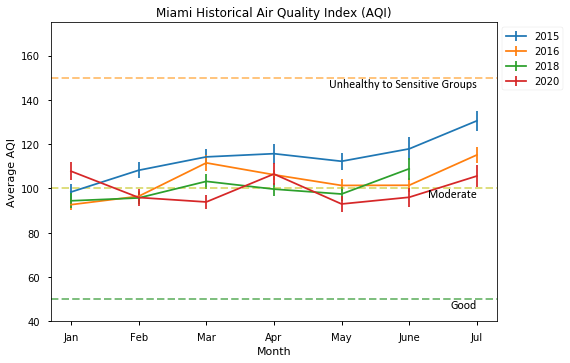

In [52]:
# fig= plt.figure(figsize=(9,7))
plt.style.use('seaborn-notebook')
# plt.xkcd()
miami_months["AQI"]["mean"].loc[2015].plot.line(label="2015",yerr=miami_months["AQI"]["sem"].loc[2015])
miami_months["AQI"]["mean"].loc[2016].plot.line(label="2016",yerr=miami_months["AQI"]["sem"].loc[2016])
miami_months["AQI"]["mean"].loc[2018].plot.line(label="2018",yerr=miami_months["AQI"]["sem"].loc[2018])
miami_months["AQI"]["mean"].loc[2020].plot.line(label="2020",yerr=miami_months["AQI"]["sem"].loc[2020])

# plt.text(6,399,'Hazardous', ha='right', va='top', fontsize=12, family='calibri')
# plt.axhline(y=301,color='m', alpha=.5, linestyle='--', lw=2)
# plt.text(6,301,'Very Unhealthy', ha='right', va='top', fontsize=12, family='calibri')
# plt.axhline(y=200,color='r', alpha=.5, linestyle='--', lw=2)
# plt.text(6,200,'Unhealthy', ha='right', va='bottom', fontsize=12,family='calibri')
plt.axhline(y=150,color='darkorange', alpha=.5, linestyle='--', lw=2)
plt.text(6,150,'Unhealthy to Sensitive Groups', ha='right', va='top', fontsize=12,family='calibri')
plt.axhline(y=100,color='y', alpha=.5, linestyle='--', lw=2)
plt.text(6,100,'Moderate', ha='right', va='top', fontsize=12,family='calibri')
plt.axhline(y=50,color='g', alpha=.5, linestyle='--', lw=2)
plt.text(6,50,'Good', ha='right', va='top', fontsize=12,family='calibri')

plt.ylim(40,175)
plt.title("Miami Historical Air Quality Index (AQI)")
plt.ylabel("Average AQI")
plt.legend(bbox_to_anchor=(1.0,1.0),loc='upper left')
plt.savefig("../Saved_figures_alvaro/miami.png")
plt.show()

In [ ]:
# miami_agg["AQI"]["mean"].loc[2015]

In [14]:
pwd

"C:\\Users\\a_mcr\\Desktop\\Bootcamp\\Group_Projects\\project-one\\Alvaro's Work\\Jupyter_notebooks_alvaro"

In [30]:
miami_months_df = miami_bins.groupby(["Year","Month"]).mean()
miami_months_df.drop(columns =["PM2.5"], inplace = True) 
miami_months_df["AQI"] = round(miami_months_df["AQI"])
miami_ave = miami_months_df

In [31]:
miami_ave.to_csv("../Saved_csv_files_alvaro/miami_ave_aqi.csv")